## 登月图片消噪

scipy.fftpack模块用来计算快速傅里叶变换  
速度比传统傅里叶变换更快，是对之前算法的改进  
图片是二维数据，注意使用fftpack的二维转变方法

In [56]:
import scipy as sp
sp.__version__

'0.19.0'

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

#快速傅里叶变换
import scipy.fftpack as fftpack

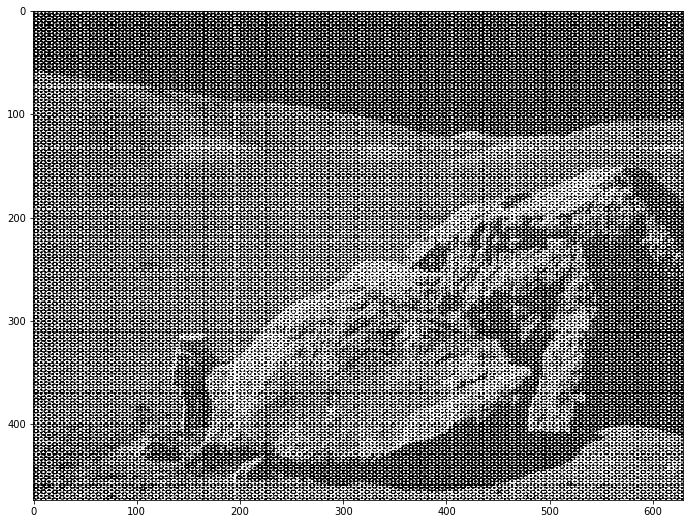

In [53]:
moon_data = plt.imread('moonlanding.png')
plt.figure(figsize=(12,9))
plt.imshow(moon_data,cmap='gray')

In [5]:
moon_data

array([[ 0.04705882,  0.        ,  0.23921569, ...,  0.        ,
         0.00392157,  0.53333336],
       [ 0.        ,  0.        ,  0.67843139, ...,  0.10196079,
         0.29019609,  0.        ],
       [ 0.72156864,  0.10980392,  0.60392159, ...,  0.        ,
         0.21568628,  1.        ],
       ..., 
       [ 0.00392157,  0.        ,  1.        , ...,  1.        ,
         1.        ,  0.95686275],
       [ 0.        ,  0.        ,  0.15686275, ...,  0.        ,
         0.        ,  0.35294119],
       [ 1.        ,  0.52156866,  0.04705882, ...,  0.        ,
         0.        ,  1.        ]], dtype=float32)

In [6]:
moon_data.shape

(474, 630)

In [21]:
#使用scipy中快速傅里叶变换进行二维的操作

moon_data_fft = fftpack.fft2(moon_data)

In [8]:
moon_data_fft

array([[ 126598.45312500   +0.j        ,   -4608.57958984-1892.46875j   ,
           -322.09298706  -20.27743912j, ...,
           -906.15850830+1539.30810547j,    -322.09298706  +20.27743912j,
          -4608.57958984+1892.46875j   ],
       [  -9421.09960938+5242.11328125j,    5224.01611328-3171.7434082j ,
           1607.99267578+1269.42431641j, ...,
           -677.34503174 -936.16174316j,     354.62469482-1003.83477783j,
           1965.36596680-2188.05932617j],
       [  -2928.35131836+7280.91601562j,   -1116.40649414+1338.31787109j,
           -474.20056152 +385.40216064j, ...,
            239.77229309 -977.21289062j,    1582.92834473 -261.95346069j,
           2641.92700195 -292.09365845j],
       ..., 
       [   1850.57177734-2451.17871094j,    -781.08068848  +13.74450111j,
            377.90707397  +12.6699295j , ...,
          -1526.78686523+1271.26208496j,   -2705.57177734-3488.52905273j,
           1897.40405273-2281.90917969j],
       [  -2928.35131836-7280.91601562j,   

In [ ]:
np.argmax/argmin:返回的是索引
    
np.where

In [24]:
moon_data_fft_r = np.where(np.abs(moon_data_fft)>3e3,0,moon_data_fft)

In [13]:
#进行频率的过滤，突兀== 高频
#过滤高频

condition = np.abs(moon_data_fft) > 8e2


#查找满足这一条件的索引

# index = np.argwhere(condition)

#
moon_data_fft[condition] = 0
# condition

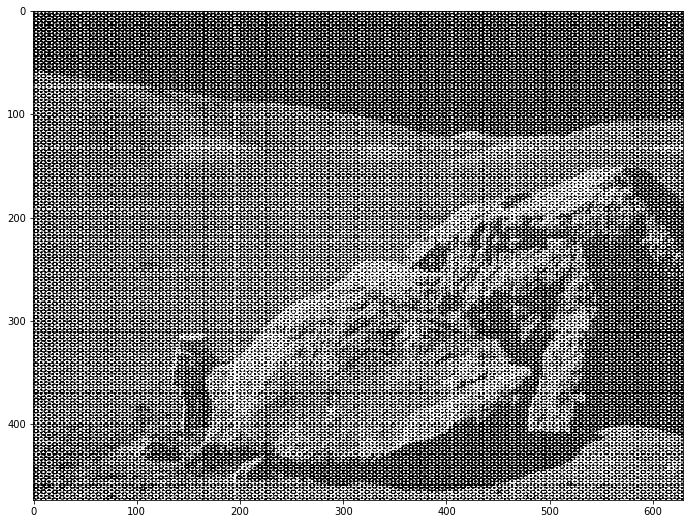

In [27]:
plt.figure(figsize=(12,9))
plt.imshow(moon_data,cmap = 'gray')

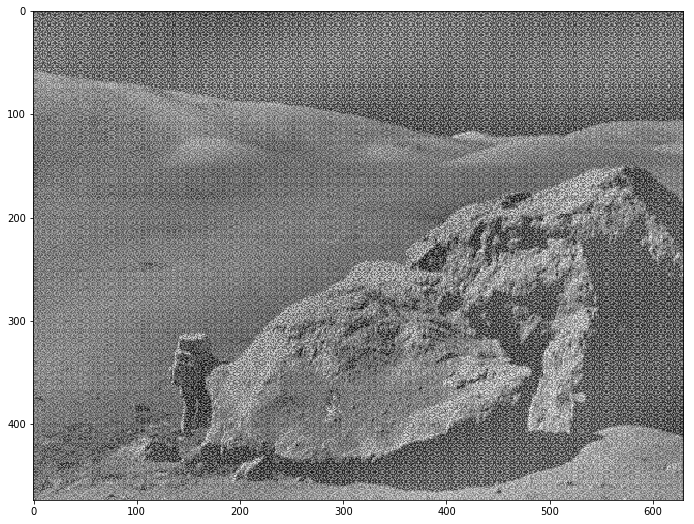

In [26]:
moon_data_ifft = fftpack.ifft2(moon_data_fft_r)

result = np.real(moon_data_ifft)


#显示
plt.figure(figsize=(12,9))
plt.imshow(result,cmap = 'gray')

In [15]:
moon_data_ifft = fftpack.ifft2(moon_data_fft)

In [17]:
moon_data_result = np.real(moon_data_ifft)

In [18]:
moon_data_result.shape

(474, 630)

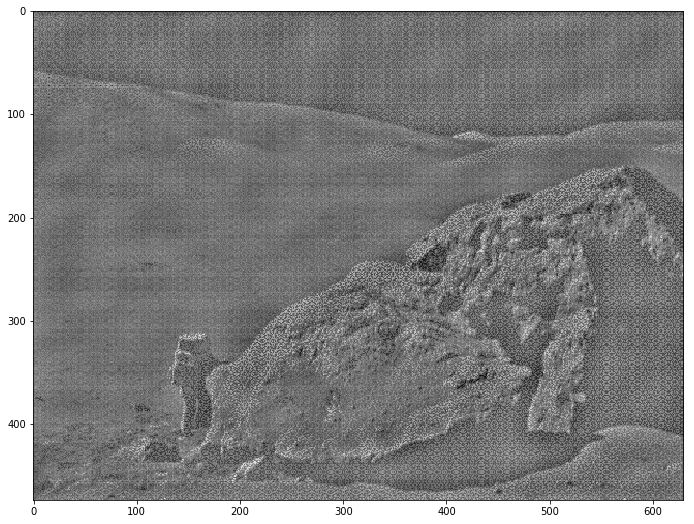

In [19]:
# 8e2
plt.figure(figsize=(12,9))
plt.imshow(moon_data_result,cmap='gray')

### 数值积分，求解圆周率
求解圆周率  

integrate
对函数(1 - x^2)^0.5进行积分 

X**2 + Y**2 = 1,半径是1  
pi×r**2,只要求得面积--->pi

首先画一个圆

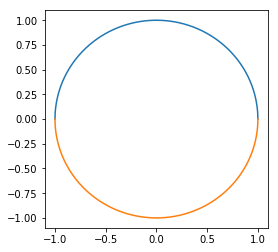

In [36]:
#x**2 + y**2 = 4

# y**2 = 1 - x**2
# f(x) = (1 - x**2)**0.5


f = lambda x : (1 - x**2)**0.5
x = np.linspace(-1,1,1000)
plt.figure(figsize=(4,4))
plt.plot(x,f(x))
plt.plot(x,-f(x))

圆的面积是？

In [ ]:
pi*r**2

r = 1

现在此圆的面积就是：pi

使用scipy.integrate进行积分，调用quad()方法

In [37]:
import scipy.integrate as integrate

In [42]:
#结果，误差
#f 不需要f(x)
pi_2,err = integrate.quad(f,-1,1)

In [40]:
pi = pi_2*2
pi

3.1415926535897967

### Scipy文件输入/输出


随机生成数组，使用scipy中的io.savemat()保存  
文件格式是.mat，标准的二进制文件

In [43]:
import scipy.io as spio

In [44]:
spio.savemat('moon.mat',{'moon':moon_data})

使用io.loadmat()读取数据

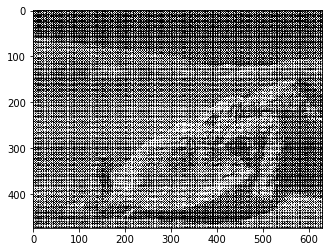

In [46]:
moon = spio.loadmat('moon.mat')['moon']
plt.imshow(moon,cmap = 'gray')

读写图片使用scipy中misc.imread()/imsave()

In [1]:
import scipy.misc as misc

In [2]:
cat_data = misc.imread('cat.jpg')

In [50]:
misc.imshow(cat_data)

misc旋转、resize、imfilter

In [52]:
cat_angle = misc.imrotate(cat_data,angle=90)
misc.imshow(cat_angle)

In [15]:
data = misc.imresize(cat_data,(200,400))

# misc.imsave('cat2.jpg',data)
#Size of the output image
misc.imshow(data)

In [21]:
#     'blur', 'contour', 'detail', 'edge_enhance', 'edge_enhance_more',
#     'emboss', 'find_edges', 'smooth', 'smooth_more', 'sharpen'
misc.imshow(misc.imfilter(cat_data,ftype='edge_enhance'))

In [20]:
misc.imshow(cat_data)

### 图片处理

使用scipy.misc.face(gray=True)获取图片，使用ndimage移动坐标、旋转图片、切割图片、缩放图片

导包，读取图片显示图片

In [22]:
import scipy.ndimage as ndimage

In [40]:
face = misc.face(gray=False)

misc.imshow(face)

shift移动坐标

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

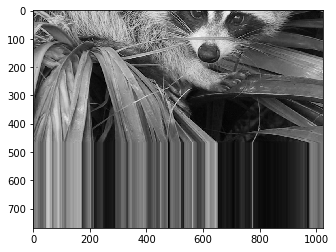

In [52]:
#'constant', 'nearest', 'reflect', 'mirror' or 'wrap'

#sequence argument must have length equal to input rank
face_shift = ndimage.shift(face,(-300,0,4),mode='nearest')
plt.imshow(face_shift,cmap = 'gray')

rotate旋转图片

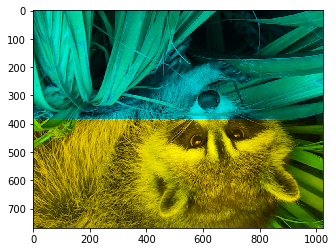

In [46]:
face_rotate = ndimage.rotate(face,180,axes=(-1,-3))

plt.imshow(face_rotate,cmap = 'gray')

zoom缩放图片

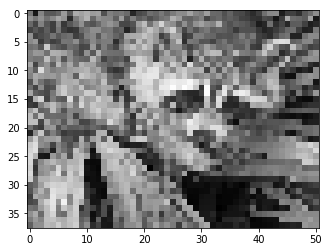

In [38]:
face_zoom = ndimage.zoom(face,zoom = 0.05)


plt.imshow(face_zoom,cmap = 'gray')

切割图片

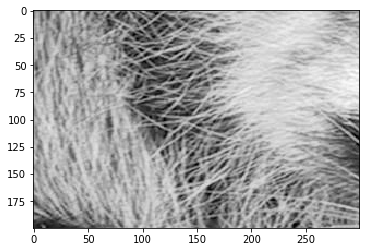

In [39]:
#数组的切片
face_mini = face[200:400,200:500]

plt.imshow(face_mini,cmap = 'gray')

图片进行过滤   
添加噪声，对噪声图片使用ndimage中的高斯滤波、中值滤波、signal中维纳滤波进行处理  
使图片变清楚

加载图片，使用灰色图片misc.face()添加噪声

In [126]:
face = misc.face(gray=True)

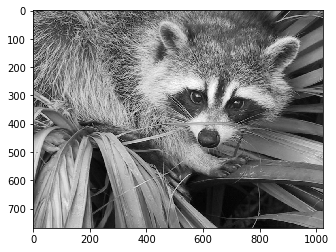

In [59]:
plt.imshow(face,cmap = 'gray')

In [60]:
face

array([[114, 130, 145, ..., 119, 129, 137],
       [ 83, 104, 123, ..., 118, 134, 146],
       [ 68,  88, 109, ..., 119, 134, 145],
       ..., 
       [ 98, 103, 116, ..., 144, 143, 143],
       [ 94, 104, 120, ..., 143, 142, 142],
       [ 94, 106, 119, ..., 142, 141, 140]], dtype=uint8)

In [64]:
face.shape

(768, 1024)

In [66]:
face.std()

54.721679908790065

In [71]:
face.dtype

dtype('uint8')

In [70]:
np.random.rand(768,1024).dtype

dtype('float64')

In [128]:
noisy_face = face.copy().astype(float)

In [129]:
#为清晰的图片的添加噪声，变模糊
noisy_face += face.std()*0.3*np.random.standard_normal(face.shape)

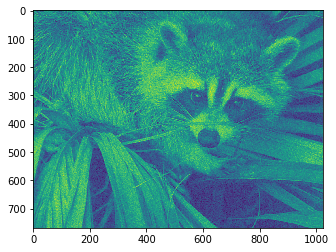

In [130]:
plt.imshow(noisy_face)

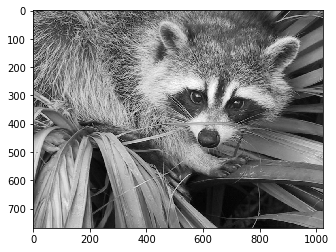

In [81]:
plt.imshow(face,cmap = 'gray')

高斯滤波sigma：高斯核的标准偏差

In [96]:
face_gaussian = ndimage.gaussian_filter(noisy_face,sigma=1)

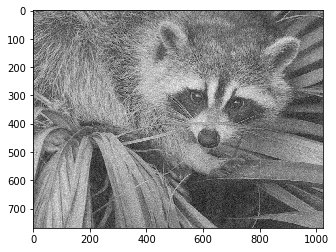

In [87]:
plt.imshow(noisy_face,cmap = 'gray')

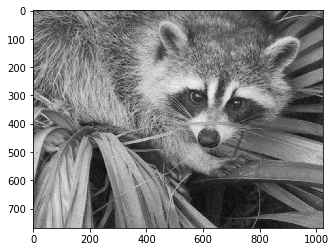

In [97]:
plt.imshow(face_gaussian,cmap = 'gray')

中值滤波参数size：给出在每个元素上从输入数组中取出的形状位置，定义过滤器功能的输入

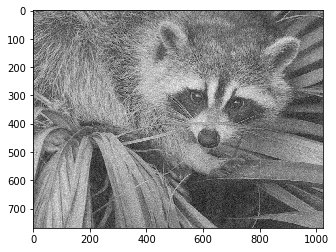

In [104]:
plt.imshow(noisy_face,cmap = 'gray')

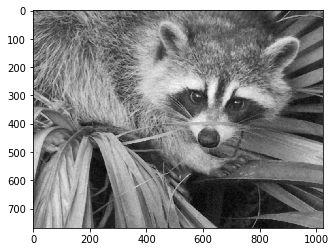

In [106]:
face_median = ndimage.median_filter(noisy_face,size = 5)

plt.imshow(face_median,cmap = 'gray')

signal维纳滤波mysize：滤镜尺寸的标量

In [107]:
import scipy.signal as signal

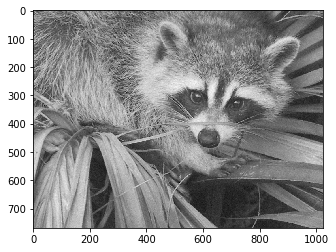

In [108]:
face_wiener = signal.wiener(noisy_face,mysize=3)
plt.imshow(face_wiener,cmap = 'gray')

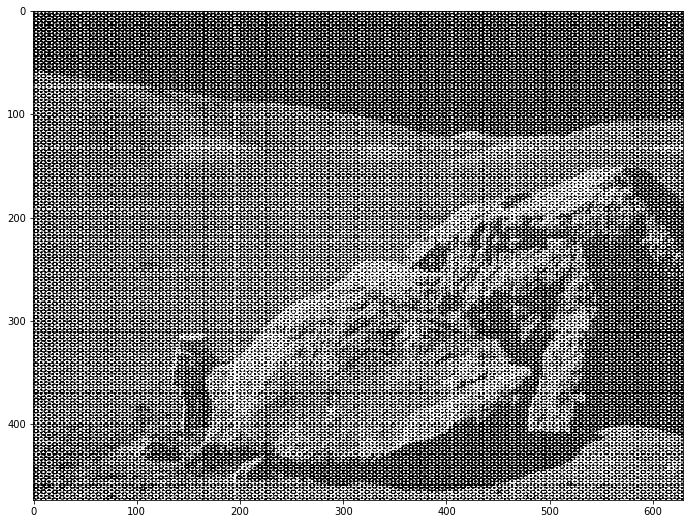

In [110]:
moon = plt.imread('moonlanding.png')

plt.figure(figsize=(12,9))
plt.imshow(moon,cmap = 'gray')

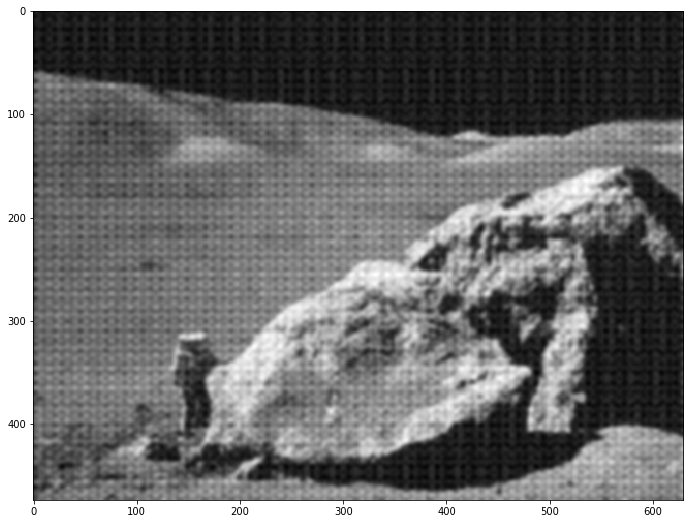

In [115]:
moon_gaussian = ndimage.gaussian_filter(moon,sigma=2)

plt.figure(figsize=(12,9))
plt.imshow(moon_gaussian,cmap = 'gray')

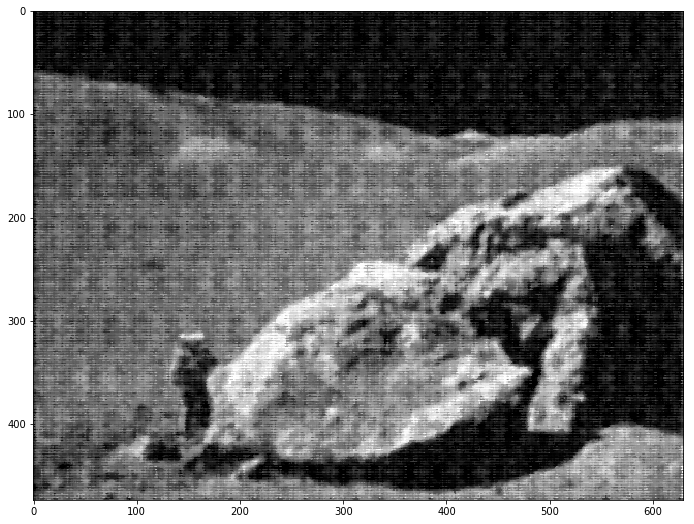

In [121]:
moon_median = ndimage.median_filter(moon,size=7)

plt.figure(figsize=(12,9))
plt.imshow(moon_median,cmap = 'gray')